<a href="https://colab.research.google.com/github/RohithKA22/Brain-Tumor-Detection/blob/main/Temp_personalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Modified_Temperature_Preferences_Data.csv", parse_dates=['timestamp'], index_col='timestamp')

# y: what the user set manually
y = df['manual_temp_setting']

# X: external features
X = df[['outside_temp', 'humidity', 'room_occupied']]

In [4]:
train_size = int(len(df) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]


In [5]:
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,1,1,24))  # for daily seasonal pattern
results = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [6]:
forecast = results.predict(start=len(y_train), end=len(y)-1, exog=X_test)


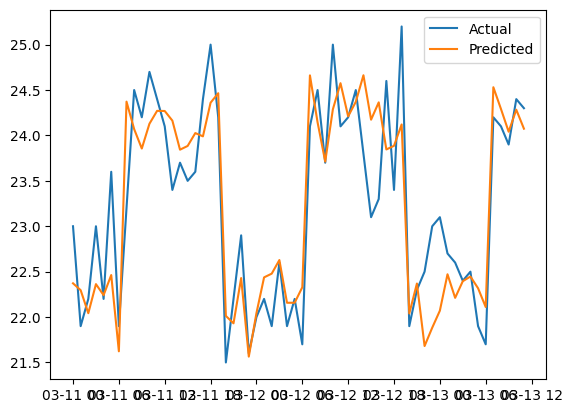

In [7]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Predicted')
plt.legend()
plt.show()


In [8]:
import pandas as pd

# Example: new input data (e.g., hour=15, outside_temp=32, humidity=62, room_occupied=1)
new_input = pd.DataFrame({
    "outside_temp": [32],
    "humidity": [62],
    "room_occupied": [1]
}, index=[pd.to_datetime("2025-03-13 15:00:00")])  # timestamp must match frequency!


In [9]:
# Forecast 1 step ahead using the new exogenous variable
predicted_temp = results.forecast(steps=1, exog=new_input)
print(predicted_temp)


2025-03-11    21.981245
Freq: h, dtype: float64


In [11]:
print(X)

                     outside_temp   humidity  room_occupied
timestamp                                                  
2025-03-01 00:00:00     30.293028  46.745151              3
2025-03-01 01:00:00     27.680971  65.457534              4
2025-03-01 02:00:00     30.073531  66.230426              3
2025-03-01 03:00:00     31.493995  49.633049              4
2025-03-01 04:00:00     34.353431  58.286562              3
...                           ...        ...            ...
2025-03-13 07:00:00     28.369726  63.545019              4
2025-03-13 08:00:00     27.861463  59.551322              1
2025-03-13 09:00:00     30.319291  67.200586              2
2025-03-13 10:00:00     29.235068  56.618038              2
2025-03-13 11:00:00     34.511979  69.004702              2

[300 rows x 3 columns]


In [12]:
print(y)

timestamp
2025-03-01 00:00:00    21.3
2025-03-01 01:00:00    23.1
2025-03-01 02:00:00    21.4
2025-03-01 03:00:00    21.7
2025-03-01 04:00:00    21.4
                       ... 
2025-03-13 07:00:00    24.2
2025-03-13 08:00:00    24.1
2025-03-13 09:00:00    23.9
2025-03-13 10:00:00    24.4
2025-03-13 11:00:00    24.3
Name: manual_temp_setting, Length: 300, dtype: float64


In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, forecast)
print(f"MAE: {mae:.2f}")


MAE: 0.42
